<a href="https://colab.research.google.com/github/kszhss/kszhss/blob/main/AnalisisDatasetFordGoBike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INSTALL & IMPORT LIBRARY**

In [ ]:
pip install numpy

In [ ]:
pip install pandas

In [ ]:
pip install seaborn

In [ ]:
%%time
import numpy as np
import pandas as pd
import seaborn as sns
import calendar
from matplotlib import pyplot as plt
sns.set()
%matplotlib inline

CPU times: user 1.29 s, sys: 109 ms, total: 1.4 s
Wall time: 1.78 s


# **CONNECT & READ DATA**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
ford_gobike = pd.read_csv('/content/drive/MyDrive/UJIKOM/fordgobike-tripdataFor201902.csv')

In [ ]:
ford_gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# **EKSPLORASI DATA**

In [ ]:
ford_gobike.shape

(183416, 16)

In [ ]:
ford_gobike.dtypes

,0
duration_sec,int64
start_time,object
end_time,object
start_station_id,float64
start_station_name,object
start_station_latitude,float64
start_station_longitude,float64
end_station_id,float64
end_station_name,object
end_station_latitude,float64


In [ ]:
ford_gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183416 entries, 0 to 183415
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183416 non-null  int64  
 1   start_time               183416 non-null  object 
 2   end_time                 183416 non-null  object 
 3   start_station_id         183219 non-null  float64
 4   start_station_name       183219 non-null  object 
 5   start_station_latitude   183416 non-null  float64
 6   start_station_longitude  183416 non-null  float64
 7   end_station_id           183219 non-null  float64
 8   end_station_name         183219 non-null  object 
 9   end_station_latitude     183416 non-null  float64
 10  end_station_longitude    183416 non-null  float64
 11  bike_id                  183416 non-null  int64  
 12  user_type                183416 non-null  object 
 13  member_birth_year        175151 non-null  float64
 14  memb

In [ ]:
ford_gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183416.000000,183219.000000,183416.000000,183416.000000,183219.000000,183416.000000,183416.000000,183416.000000,175151.000000
mean,726.067311,138.590365,37.771221,-122.352661,136.249401,37.771425,-122.352247,4472.890260,1984.806504
std,1794.371831,111.778938,0.099586,0.117100,111.514916,0.099494,0.116677,1664.386068,10.116589
min,61.000000,3.000000,37.317298,-122.453705,3.000000,37.317298,-122.453705,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [ ]:
ford_gobike.describe(include='all')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
count,183416.000000,183416,183416,183219.000000,183219,183416.000000,183416.000000,183219.000000,183219,183416.000000,183416.000000,183416.000000,183416,175151.000000,175151,183416
unique,NaN,35783,35767,NaN,329,NaN,NaN,NaN,329,NaN,NaN,NaN,2,NaN,3,2
top,NaN,33:48.5,22:24.4,NaN,Market St at 10th St,NaN,NaN,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,NaN,NaN,Subscriber,NaN,Male,No
freq,NaN,16,20,NaN,3904,NaN,NaN,NaN,4857,NaN,NaN,NaN,163548,NaN,130655,166056
mean,726.067311,NaN,NaN,138.590365,NaN,37.771221,-122.352661,136.249401,NaN,37.771425,-122.352247,4472.890260,NaN,1984.806504,NaN,NaN
std,1794.371831,NaN,NaN,111.778938,NaN,0.099586,0.117100,111.514916,NaN,0.099494,0.116677,1664.386068,NaN,10.116589,NaN,NaN
min,61.000000,NaN,NaN,3.000000,NaN,37.317298,-122.453705,3.000000,NaN,37.317298,-122.453705,11.000000,NaN,1878.000000,NaN,NaN
25%,325.000000,NaN,NaN,47.000000,NaN,37.770083,-122.412408,44.000000,NaN,37.770407,-122.411726,3777.000000,NaN,1980.000000,NaN,NaN
50%,514.000000,NaN,NaN,104.000000,NaN,37.780760,-122.398285,100.000000,NaN,37.781010,-122.398279,4958.000000,NaN,1987.000000,NaN,NaN
75%,796.000000,NaN,NaN,239.000000,NaN,37.797280,-122.286533,235.000000,NaN,37.797320,-122.288045,5502.000000,NaN,1992.000000,NaN,NaN


In [ ]:
ford_gobike.nunique()

,0
duration_sec,4752
start_time,35783
end_time,35767
start_station_id,329
start_station_name,329
start_station_latitude,334
start_station_longitude,335
end_station_id,329
end_station_name,329
end_station_latitude,335


# **PREPOCESSING**

1. Proses memastikan tidak ada data yang kosong

In [ ]:
ford_gobike.isnull().sum()

,0
duration_sec,0
start_time,0
end_time,0
start_station_id,197
start_station_name,197
start_station_latitude,0
start_station_longitude,0
end_station_id,197
end_station_name,197
end_station_latitude,0


<Axes: >

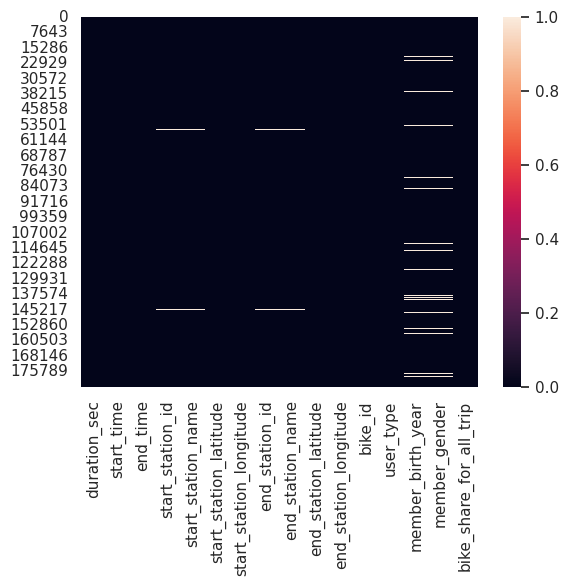

In [ ]:
#membuat heatmap data null
sns.heatmap(ford_gobike.isnull())

2. Membuat copy file

In [ ]:
#membuat copy file ford_goride dengan nama fg_copy
fg_copy = ford_gobike.copy()

In [ ]:
fg_copy.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No


3. Mencari outlier

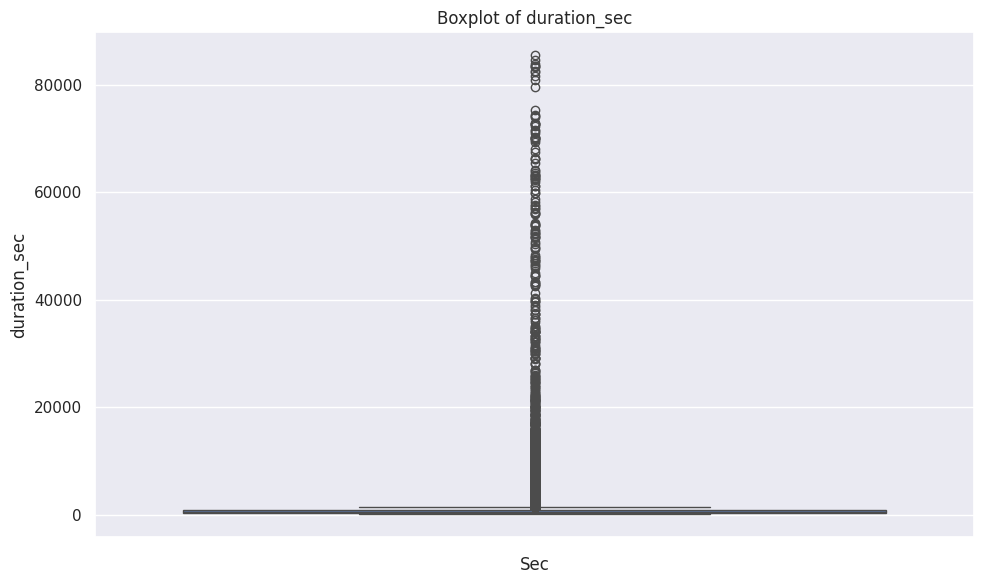

In [ ]:
#membuat boxplot untuk mencari data outlier
plt.figure(figsize=(10,6))
sns.boxplot(fg_copy['duration_sec'])
plt.title('Boxplot of duration_sec')
plt.xlabel('Sec')
plt.tight_layout()
plt.show()

4. MENGATASI DATA NULL

In [ ]:
#menampilkan data null
fg_copy.isnull().sum()

,0
duration_sec,0
start_time,0
end_time,0
start_station_id,197
start_station_name,197
start_station_latitude,0
start_station_longitude,0
end_station_id,197
end_station_name,197
end_station_latitude,0


In [ ]:
#mengganti data null pada kolom start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender menjadi "kosong"
fg_copy.fillna({'start_station_id':'kosong', 'start_station_name':'kosong', 'end_station_id':'kosong', 'end_station_name':'kosong',
                'member_birth_year':'kosong', 'member_gender':'kosong'}, inplace=True)

In [ ]:
#menampilkan kembali data null
fg_copy.isnull().sum()

,0
duration_sec,0
start_time,0
end_time,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0
end_station_name,0
end_station_latitude,0


<Axes: >

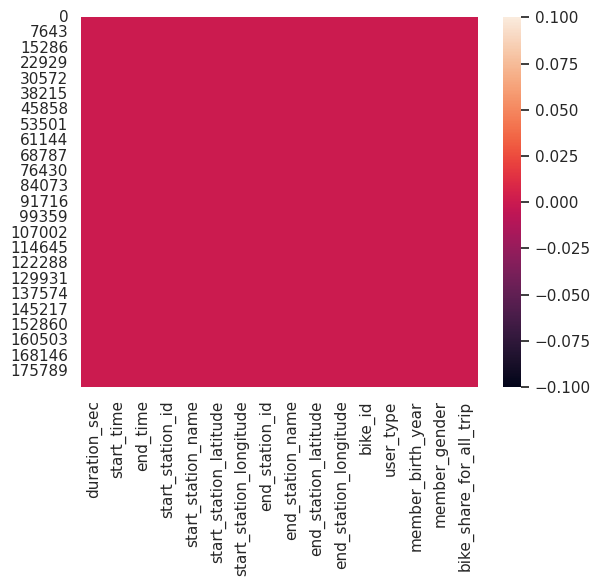

In [ ]:
#membuat heatmap data null
sns.heatmap(fg_copy.isnull())

# **VALIDASI DATA**

1. Memastikan tidak ada data duplikat

In [ ]:
#mengecek jumlah data duplikat
fg_copy.duplicated().sum()

4

In [ ]:
#menghapus data duplikat
fg_copy.drop_duplicates(inplace=True)

In [ ]:
#mengecek kembali jumlah data duplikat
fg_copy.duplicated().sum()

0

In [ ]:
#menampilkan kembali ukuran dataframe
fg_copy.shape

(183412, 16)

2. Menampilkan korelasi antar kolom untuk analisis

In [ ]:
fg_copy.corr(numeric_only = True)

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id
duration_sec,1.000000,0.010513,-0.037930,0.010873,-0.038906,-0.006133
start_station_latitude,0.010513,1.000000,-0.677227,0.989969,-0.682637,0.049996
start_station_longitude,-0.037930,-0.677227,1.000000,-0.681815,0.992410,-0.141782
end_station_latitude,0.010873,0.989969,-0.681815,1.000000,-0.684197,0.049244
end_station_longitude,-0.038906,-0.682637,0.992410,-0.684197,1.000000,-0.143527
bike_id,-0.006133,0.049996,-0.141782,0.049244,-0.143527,1.000000


<Axes: >

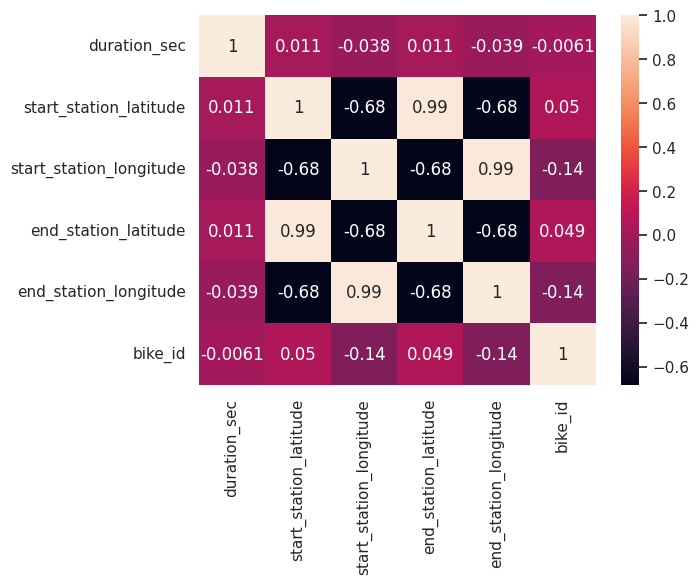

In [ ]:
sns.heatmap(fg_copy.corr(numeric_only = True), annot = True)

In [ ]:
correlation_matrix = fg_copy[['duration_sec', 'start_station_latitude', 'start_station_longitude',
                             'end_station_latitude', 'end_station_longitude']].corr()
print(correlation_matrix)

                         duration_sec  start_station_latitude  \
duration_sec                 1.000000                0.010513   
start_station_latitude       0.010513                1.000000   
start_station_longitude     -0.037930               -0.677227   
end_station_latitude         0.010873                0.989969   
end_station_longitude       -0.038906               -0.682637   

                         start_station_longitude  end_station_latitude  \
duration_sec                           -0.037930              0.010873   
start_station_latitude                 -0.677227              0.989969   
start_station_longitude                 1.000000             -0.681815   
end_station_latitude                   -0.681815              1.000000   
end_station_longitude                   0.992410             -0.684197   

                         end_station_longitude  
duration_sec                         -0.038906  
start_station_latitude               -0.682637  
start_station_lon

<Axes: >

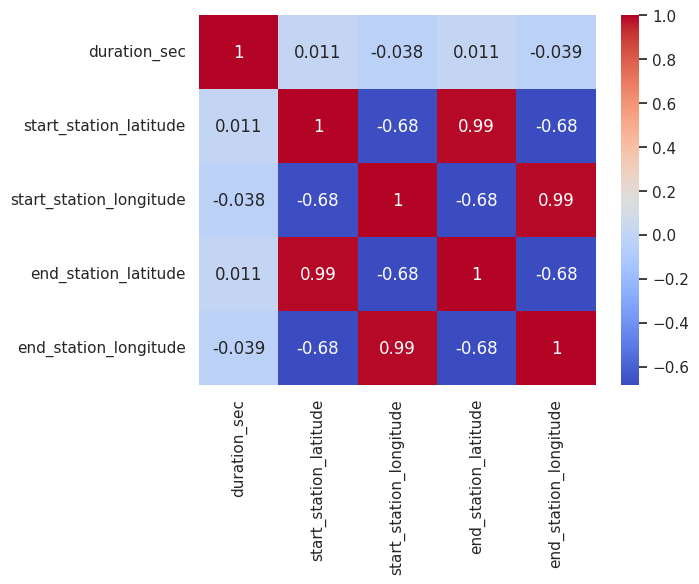

In [ ]:
#menampilkan heatmap hasil korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [ ]:
# Mengkonversi kolom start_time ke format datetime
fg_copy['start_time'] = pd.to_datetime(fg_copy['start_time'], errors='coerce')

# Mengekstrak jam dari kolom start_time
fg_copy['hour'] = fg_copy['start_time'].dt.hour

<ipython-input-31-f768218abd14>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fg_copy['start_time'] = pd.to_datetime(fg_copy['start_time'], errors='coerce')


In [ ]:
fg_copy.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,hour
0,52185,NaT,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,NaN
1,42521,NaT,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,kosong,kosong,No,NaN


3. menampilkan hasil visualisasi analisis dengan chart yang tepat

PERSENTASE TIPE USER

In [ ]:
#menampilkan jenis pada kolom user_type
type_counts = fg_copy['user_type'].value_counts()
type_counts

,count
user_type,
Subscriber,163544
Customer,19868


In [ ]:
#menampilkan persentase setiap nilai pada kolom type
type_percentage = fg_copy['user_type'].value_counts(normalize=True) * 100
type_percentage

,proportion
user_type,
Subscriber,89.167557
Customer,10.832443


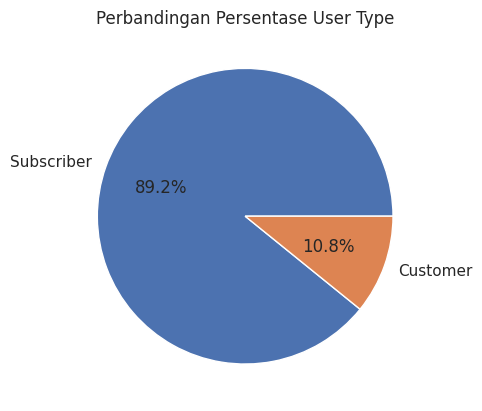

In [ ]:
#membuat pie chart perbandingan persentase user_type
plt.pie(type_percentage, labels=type_percentage.index, autopct='%1.1f%%')
plt.title('Perbandingan Persentase User Type')
plt.show()

In [ ]:
# Menghitung lalu lintas untuk setiap stasiun
station_traffic = fg_copy['start_station_name'].value_counts() + fg_copy['end_station_name'].value_counts()

# Mendapatkan 10 stasiun dengan lalu lintas tertinggi
top_10_stations = station_traffic.nlargest(10)

# Mendapatkan 10 stasiun dengan lalu lintas terendah
bottom_10_stations = station_traffic.nsmallest(10)

# Menampilkan hasil
print("10 Stasiun dengan Lalu Lintas Tertinggi:")
print(top_10_stations)

print("\n10 Stasiun dengan Lalu Lintas Terendah:")
print(bottom_10_stations)

10 Stasiun dengan Lalu Lintas Tertinggi:
San Francisco Caltrain Station 2  (Townsend St at 4th St)    8401
Market St at 10th St                                         7877
Montgomery St BART Station (Market St at 2nd St)             6542
San Francisco Ferry Building (Harry Bridges Plaza)           6078
Berry St at 4th St                                           5924
Powell St BART Station (Market St at 4th St)                 5757
San Francisco Caltrain (Townsend St at 4th St)               5650
Powell St BART Station (Market St at 5th St)                 4680
Steuart St at Market St                                      4621
The Embarcadero at Sansome St                                4594
Name: count, dtype: int64

10 Stasiun dengan Lalu Lintas Terendah:
16th St Depot                             8
21st Ave at International Blvd           10
Palm St at Willow St                     11
Willow St at Vine St                     14
Parker Ave at McAllister St              16
Taylor St at

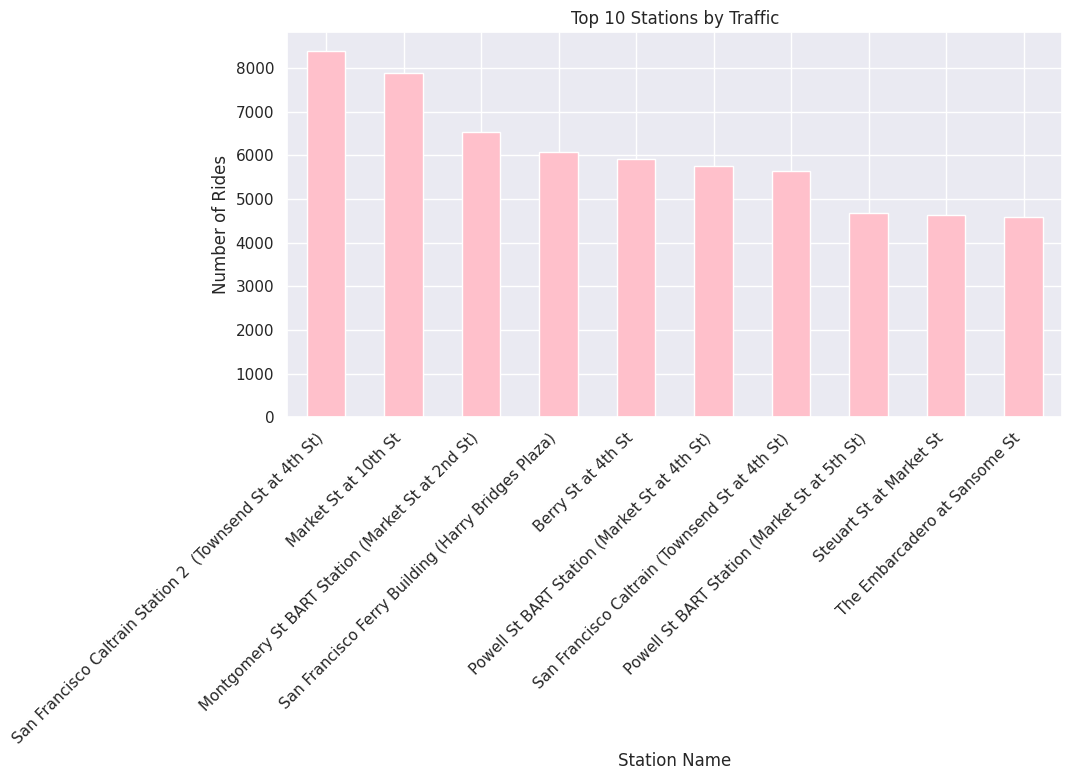

In [ ]:
# Plot bar chart untuk 10 stasiun dengan lalu lintas tertinggi
plt.figure(figsize=(10, 5))
top_10_stations.plot(kind='bar', color='pink')
plt.title('Top 10 Stations by Traffic')
plt.xlabel('Station Name')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45, ha="right")
plt.show()

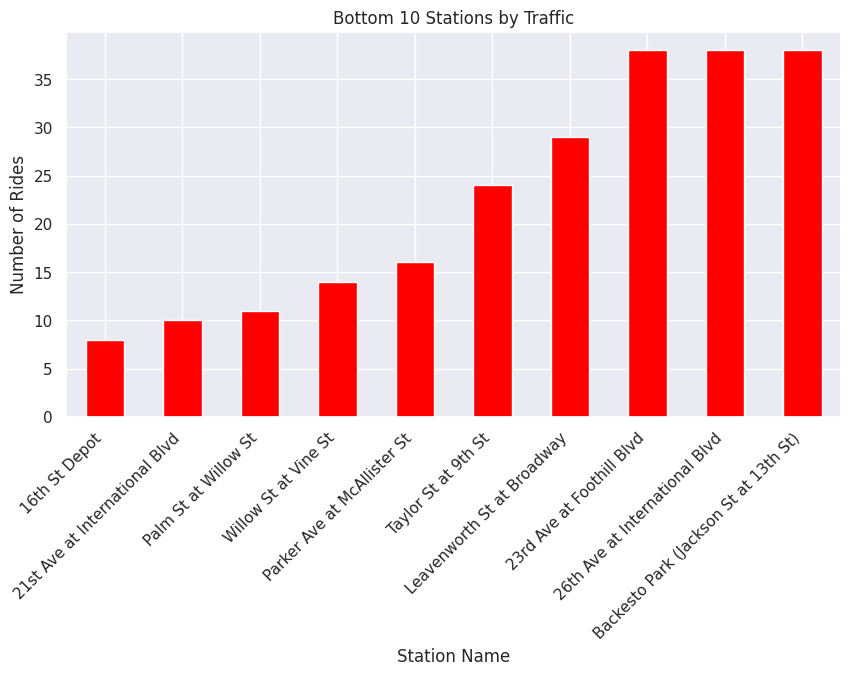

In [ ]:
# Plot bar chart untuk 10 stasiun dengan lalu lintas terendah
plt.figure(figsize=(10, 5))
bottom_10_stations.plot(kind='bar', color='red')
plt.title('Bottom 10 Stations by Traffic')
plt.xlabel('Station Name')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
# Menghitung jumlah perjalanan untuk setiap jam
hourly_traffic = fg_copy['hour'].value_counts().sort_index()

# Mendapatkan 10 jam operasional dengan lalu lintas tertinggi
top_10_hours = hourly_traffic.nlargest(10)

# Mendapatkan 10 jam operasional dengan lalu lintas terendah
bottom_10_hours = hourly_traffic.nsmallest(10)

# Menampilkan hasil
print("10 Jam Operasional dengan Lalu Lintas Tertinggi:")
print(top_10_hours)

print("\n10 Jam Operasional dengan Lalu Lintas Terendah:")
print(bottom_10_hours)

10 Jam Operasional dengan Lalu Lintas Tertinggi:
hour
8.0     3309
7.0     3295
10.0    3232
6.0     3215
11.0    3197
9.0     3195
13.0    3173
12.0    3121
3.0     3092
5.0     3091
Name: count, dtype: int64

10 Jam Operasional dengan Lalu Lintas Terendah:
hour
20.0    2881
0.0     2895
21.0    2967
19.0    2983
1.0     2991
16.0    2996
18.0    2996
2.0     3004
4.0     3008
22.0    3008
Name: count, dtype: int64


In [ ]:
corr1 = fg_copy[['start_time', 'hour']].corr()
print(corr1)

            start_time      hour
start_time    1.000000  0.999105
hour          0.999105  1.000000


<Axes: >

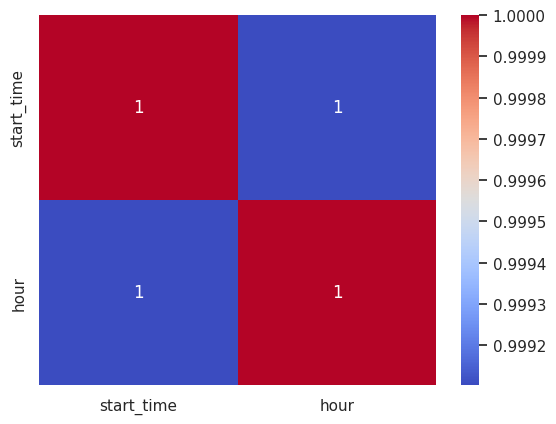

In [ ]:
sns.heatmap(corr1, annot=True, cmap='coolwarm')

In [ ]:
fg_copy.dtypes

,0
duration_sec,int64
start_time,datetime64[ns]
end_time,object
start_station_id,object
start_station_name,object
start_station_latitude,float64
start_station_longitude,float64
end_station_id,object
end_station_name,object
end_station_latitude,float64


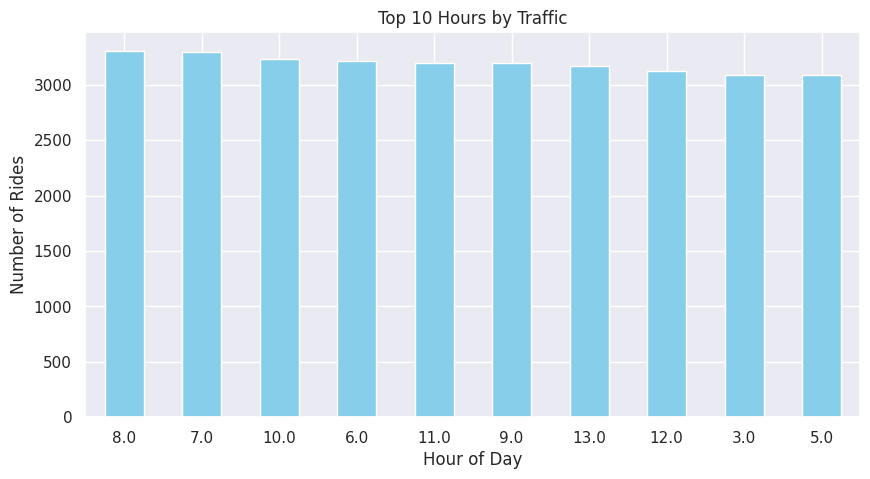

In [ ]:
# Plot bar chart untuk 10 jam operasional dengan lalu lintas tertinggi
plt.figure(figsize=(10, 5))
top_10_hours.plot(kind='bar', color='skyblue')
plt.title('Top 10 Hours by Traffic')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.show()


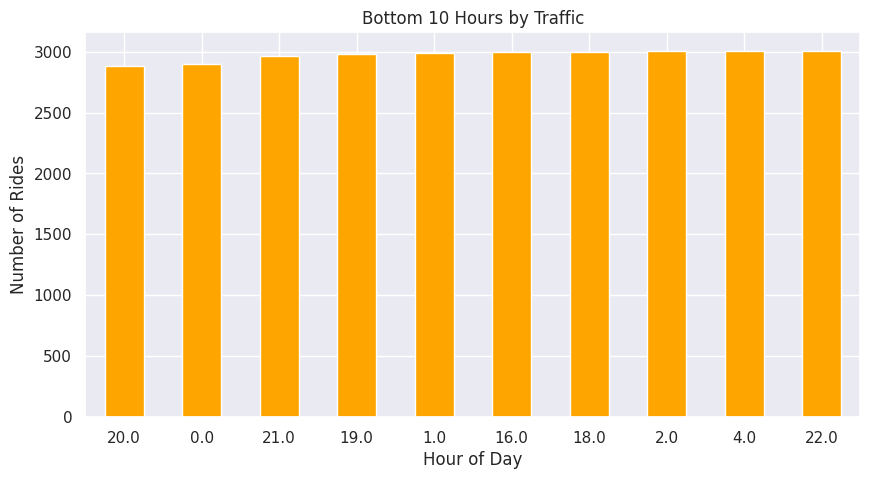

In [ ]:
# Plot bar chart untuk 10 jam operasional dengan lalu lintas terendah
plt.figure(figsize=(10, 5))
bottom_10_hours.plot(kind='bar', color='orange')
plt.title('Bottom 10 Hours by Traffic')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.show()

In [ ]:
fg_copy.to_csv('data hasil_10120580_khofifah setiorani.csv')